## This notebook exemplifies full notebook usage of bbSelect

In [1]:
import sys
import os
sys.path.append('../')
from bbSelectBuild import bbSelectBuild
from bbSelect import Picker

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15,10]

## Build the bbSelect database

### Set the parameters for bbSelectBuild, which builds the bbSelect database

In [2]:
smiles_file = '../data/enamine_acids/enamine_acids_filtered.csv'
output_root = '../data/enamine_acids/enamine_acids_full_usage_example'
cell_size = 1
num_cells = 20
ncpu = len(os.sched_getaffinity(0)) -1

# Set the SMARTS that will be used to clip the "core scaffold" to [15CH3]. 
# If using the results from an R-group decomposition, you need to generate the clipped smiles file yourself replacing * with [15CH3]

rxn_smarts = '[C:1](=[O:2])[OH]>>[C:1](=[O:2])[15CH3]'

# Below are the default settings for bbSelectBuild and do not need to be set if using default. 
# However, if changing anything, these will need to be set

conformer_generation_program = 'omega' # Can be set to 'rdkit' if rdkit is to be used. Warning: this takes MUCH longer

# These are required to run omega from python
omega_load_command = 'module load openeye'
omega_run_command = 'omega2'

# If the clipped smiles file has already been generated you can load that in and define the separator in the file
# If you are using the results of an R-group decomposition, the clipped file will need to be loaded in where * has been replaced by [15CH3]
clipped_smiles_file  = None
clipped_smiles_file_sep = None

# If the conformers, or the aligned conformers have already been generated, set the paths here
conformer_sdf = None
aligned_mols_sdf = None

# If you would like to save the aligned conformers, you can set the path here
save_aligned_mols_sdf = None

### Initiate the bbSelectBuild class

In [3]:
bbSelectBuilder = bbSelectBuild(
                                smiles_file = smiles_file, 
                                output_root = output_root, 
                                cell_size = cell_size, 
                                num_cells = num_cells, 
                                ncpu = ncpu, 
                                rxn_smarts = rxn_smarts
                                )

# Set options in bbSelectBuild
bbSelectBuilder.SetOption('conformer_generation_program', conformer_generation_program)
bbSelectBuilder.SetOption('omega_load_command', omega_load_command)
bbSelectBuilder.SetOption('omega_run_command', omega_run_command)
bbSelectBuilder.SetOption('clipped_smiles_file', clipped_smiles_file)
bbSelectBuilder.SetOption('clipped_smiles_file_sep', clipped_smiles_file_sep)
bbSelectBuilder.SetOption('conformer_sdf', conformer_sdf)
bbSelectBuilder.SetOption('aligned_mols_sdf', aligned_mols_sdf)
bbSelectBuilder.SetOption('save_aligned_mols_sdf', save_aligned_mols_sdf)

### Run the bbSelectBuilder and get the location of the database

In [4]:
bbSelect = bbSelectBuilder.Run()
bin_file = bbSelect.GetBinLocation()
ref_file = bbSelect.GetRefLocation()
print(bin_file, ref_file)

2024-02-21 11:38:40,871 - root - INFO - loading smiles file
2024-02-21 11:38:40,930 - root - INFO - clipping smiles file
2024-02-21 11:38:43,911 - root - INFO - 19280 compounds clipped in 2.980114459991455 seconds
2024-02-21 11:38:43,912 - root - INFO - clipped smiles saved at ../data/enamine_acids/enamine_acids_filtered_clipped.tsv
2024-02-21 11:38:43,933 - root - INFO - generating conformers
2024-02-21 11:38:43,934 - root - INFO - Attempting to run the following command in shell:
module load openeye; omega2 -flipper true -in ../data/enamine_acids/enamine_acids_filtered_clipped.tsv -out ../data/enamine_acids/enamine_acids_filtered_clipped_conformers.sdf -mpi_np 29
2024-02-21 11:40:07,730 - root - INFO - conformer generation with omega completed in 83.8 seconds
2024-02-21 11:40:07,732 - root - INFO - loading conformer sdf
2024-02-21 11:41:21,813 - root - INFO - 563182 conformers loaded in 74.08008813858032 seconds
2024-02-21 11:41:21,814 - root - INFO - Running alignment over 29 cores


../data/enamine_acids/enamine_acids_full_usage_example.bin ../data/enamine_acids/enamine_acids_full_usage_example.ref


## Select compounds from the bbSelect database

### Set the parameters for bbSelect, which performs the selection

In [5]:
n_select = 48
ncpu = len(os.sched_getaffinity(0)) -1
sort = 'MPO'
tanimoto = 0.9
pharmacophores = '*'
method = 'classic'
use_coverage = False

### Run the selection

2024-02-21 11:43:30,448 - root - INFO - Beginning generation of query fingerprints
2024-02-21 11:43:30,456 - root - INFO - Starting set-driven division of area
2024-02-21 11:43:31,188 - root - INFO - Generation of query fingerprints execution time = 0.74 seconds
2024-02-21 11:43:31,189 - root - INFO - Starting fingerprint matching algorithm over 29 cores
2024-02-21 11:43:43,902 - root - INFO - fingerprint matching execution time = 12.71 seconds
2024-02-21 11:43:43,903 - root - INFO - Starting selection algorithm
2024-02-21 11:43:44,547 - root - INFO - selection execution time = 0.64 seconds
2024-02-21 11:43:44,549 - root - DEBUG - skip 13 rows


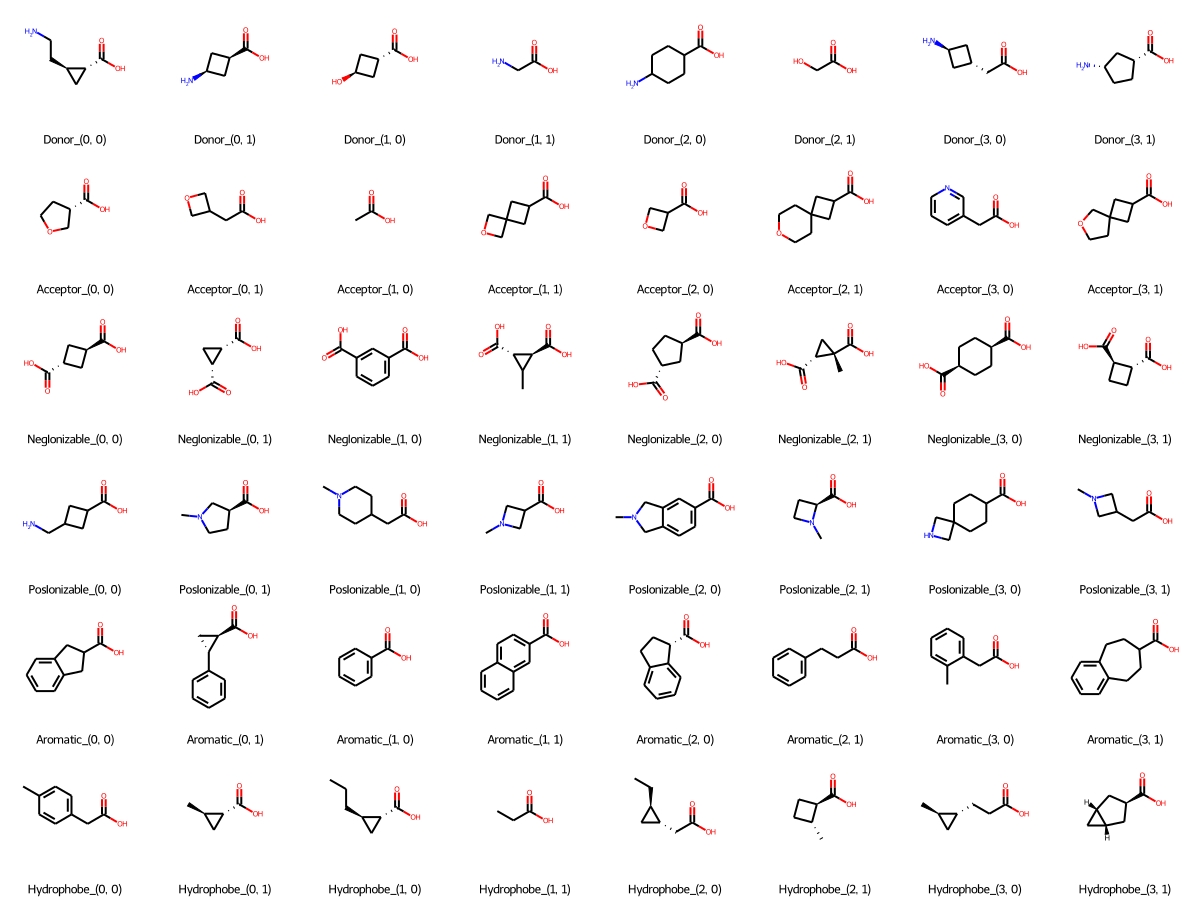

In [6]:
bbSelection = Picker(ref_file = ref_file, 
                        bin_file = bin_file, 
                               n = n_select,  # How many compounds to select
                          method = 'som', # Which clustering method to use
                  pharmacophores = pharmacophores, # Which pharmacophore to select from,
                            ncpu = ncpu,  # Number of cpus to use,
                            sort = sort,
                            tanimoto = tanimoto,
                            use_coverage = use_coverage)

bbSelection.DrawSelectedMols(align_smiles = 'CC(=O)O')